In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

from config import api_key

In [2]:
base_url = "https://api.eia.gov/v2/electricity/retail-sales/data"

In [3]:
X_Params = {
    "api_key": api_key,
    "frequency": "monthly",
    "data[0]": "price",
    "facets":{},
    "start": "2021-01",
    "end": "2021-12",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

In [4]:
response = requests.get(base_url,params=X_Params).json()

In [5]:
sectorDF = pd.DataFrame(response["response"]["data"])
display(sectorDF.head())
print(f"Number of Rows: {len(sectorDF)}")

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2021-12,IN,Indiana,OTH,other,NaN,cents per kilowatthour
1,2021-12,US,U.S. Total,TRA,transportation,10.49,cents per kilowatthour
2,2021-12,US,U.S. Total,RES,residential,13.72,cents per kilowatthour
3,2021-12,US,U.S. Total,OTH,other,NaN,cents per kilowatthour
4,2021-12,US,U.S. Total,IND,industrial,7.06,cents per kilowatthour


Number of Rows: 4464


In [6]:
sectorDF.dropna(subset=["price"],inplace=True,how="all")

In [7]:
len(sectorDF)

3720

In [8]:
sectorDF["period"] = pd.to_datetime(sectorDF["period"])
sectorDF.head()

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
1,2021-12-01,US,U.S. Total,TRA,transportation,10.49,cents per kilowatthour
2,2021-12-01,US,U.S. Total,RES,residential,13.72,cents per kilowatthour
4,2021-12-01,US,U.S. Total,IND,industrial,7.06,cents per kilowatthour
5,2021-12-01,US,U.S. Total,COM,commercial,11.15,cents per kilowatthour
6,2021-12-01,US,U.S. Total,ALL,all sectors,11.03,cents per kilowatthour


In [9]:
sectorAgg = sectorDF.groupby("sectorid").agg(["mean","median","var","std","sem"])["price"]
sectorAgg

C:\Users\Frances Jay\AppData\Local\Temp\ipykernel_22476\1356841174.py:1: FutureWarning: ['period', 'stateid', 'stateDescription', 'sectorName', 'price-units'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sectorAgg = sectorDF.groupby("sectorid").agg(["mean","median","var","std","sem"])["price"]


,mean,median,var,std,sem
sectorid,,,,,
ALL,11.895672,10.255,19.553045,4.421883,0.162114
COM,11.806290,10.575,17.447890,4.177067,0.153139
IND,8.432325,7.065,17.339783,4.164107,0.152664
RES,14.533871,12.815,22.342763,4.726813,0.173293
TRA,5.973118,7.115,27.595533,5.253145,0.192590


In [10]:
sectorTimeAgg = sectorDF.groupby(["sectorid","period"]).agg(["mean","median","var","std","sem"])["price"]
sectorTimeAgg

C:\Users\Frances Jay\AppData\Local\Temp\ipykernel_22476\1701385800.py:1: FutureWarning: ['stateid', 'stateDescription', 'sectorName', 'price-units'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sectorTimeAgg = sectorDF.groupby(["sectorid","period"]).agg(["mean","median","var","std","sem"])["price"]


mean  median        var       std       sem
sectorid period                                                      
ALL      2021-01-01  11.236774   9.585  18.408403  4.290501  0.544894
         2021-02-01  11.888710  10.315  18.791385  4.334903  0.550533
         2021-03-01  11.538548   9.920  19.399681  4.404507  0.559373
         2021-04-01  11.499194   9.800  18.766237  4.332002  0.550165
         2021-05-01  11.559194  10.085  18.301657  4.278044  0.543312
         2021-06-01  12.065484  10.495  18.350271  4.283722  0.544033
         2021-07-01  12.257903  10.700  19.443023  4.409424  0.559997
         2021-08-01  12.265645  10.705  18.936412  4.351599  0.552654
         2021-09-01  12.370323  10.605  21.012016  4.583887  0.582154
         2021-10-01  12.076774  10.315  20.849619  4.566138  0.579900
         2021-11-01  12.007581  10.375  20.674547  4.546927  0.577460
         2021-12-01  11.981935  10.205  23.799055  4.878428  0.619561
COM      2021-01-01  11.047097   9.775  15.744477  3.967931  0.503928
         2021-02-01  11.792742  10.460  16.489814  4.060765  0.515718
         2021-03-01  11.505161  10.135  16.508075  4.063013  0.516003
         2021-04-01  11.502903  10.295  16.327106  4.040681  0.513167
         2021-05-01  11.635484  10.470  16.391737  4.048671  0.514182
         2021-06-01  11.988065  10.730  17.097495  4.134912  0.525134
         2021-07-01  12.062258  10.735  18.444565  4.294714  0.545429
         2021-08-01  12.036452  10.715  17.872236  4.227557  0.536900
         2021-09-01  12.186129  10.735  19.047759  4.364374  0.554276
         2021-10-01  12.084355  10.745  18.791359  4.334900  0.550533
         2021-11-01  11.989516  10.865  17.987719  4.241193  0.538632
         2021-12-01  11.845323  10.540  20.602379  4.538984  0.576452
IND      2021-01-01   7.743871   6.330  16.107919  4.013467  0.509711
         2021-02-01   8.679677   7.585  16.748643  4.092511  0.519749
         2021-03-01   8.089194   6.895  17.136601  4.139638  0.525735
         2021-04-01   7.947258   6.420  15.733627  3.966564  0.503754
         2021-05-01   8.010484   6.655  15.747778  3.968347  0.503981
         2021-06-01   8.505000   7.195  16.661822  4.081890  0.518400
         2021-07-01   8.747419   7.445  16.902105  4.111217  0.522125
         2021-08-01   8.735161   7.380  16.855491  4.105544  0.521405
         2021-09-01   8.866613   7.415  18.332452  4.281641  0.543769
         2021-10-01   8.696290   7.110  18.960663  4.354384  0.553007
         2021-11-01   8.614355   7.170  18.712169  4.325756  0.549372
         2021-12-01   8.552581   7.010  21.710980  4.659504  0.591758
RES      2021-01-01  13.525000  11.710  21.474809  4.634092  0.588530
         2021-02-01  13.942258  12.200  22.820047  4.777033  0.606684
         2021-03-01  14.066613  12.320  22.859010  4.781110  0.607202
         2021-04-01  14.584355  12.675  22.378527  4.730595  0.600786
         2021-05-01  14.695484  13.065  21.043586  4.587329  0.582591
         2021-06-01  14.675323  13.070  20.416074  4.518415  0.573839
         2021-07-01  14.682097  13.015  21.660174  4.654049  0.591065
         2021-08-01  14.735161  13.055  21.180989  4.602281  0.584490
         2021-09-01  15.062581  13.140  23.597210  4.857696  0.616928
         2021-10-01  15.050484  13.385  22.519100  4.745429  0.602670
         2021-11-01  14.877097  13.180  23.325723  4.829671  0.613369
         2021-12-01  14.510000  12.595  26.466085  5.144520  0.653355
TRA      2021-01-01   5.694032   6.730  26.354838  5.133696  0.651980
         2021-02-01   5.800000   6.900  26.898698  5.186396  0.658673
         2021-03-01   5.742419   7.015  26.163219  5.114999  0.649606
         2021-04-01   5.930968   7.215  28.228163  5.313018  0.674754
         2021-05-01   5.942581   7.105  28.624537  5.350190  0.679475
         2021-06-01   6.040968   7.240  29.404560  5.422597  0.688671
         2021-07-01   6.053871   7.365  27.915955  5.283555  0.671012
         2021-08-01   6.129194   7.3

In [14]:
residential = sectorDF.loc[(sectorDF["sectorid"]=="RES")]
commercial = sectorDF.loc[sectorDF["sectorid"]=="COM"]
transportation = sectorDF.loc[sectorDF["sectorid"]=="TRA"]
industrial = sectorDF.loc[sectorDF["sectorid"]=="IND"]
allSectors = sectorDF.loc[sectorDF["sectorid"]=="ALL"]
sectorSummary = pd.DataFrame({
    "residential":residential["price"],
    "commercial":commercial["price"],
    "transportation":transportation["price"],
    "industrial":industrial["price"],
    "all":allSectors["price"],
})

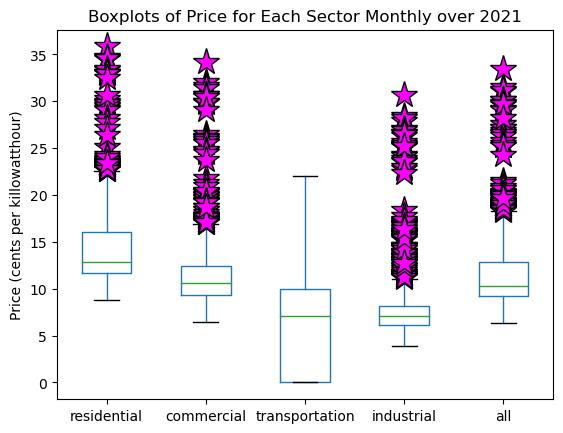

In [15]:
sectorBoxplot = sectorSummary.boxplot(grid=False,flierprops={
    "marker":"*","markersize":20,"markerfacecolor":"fuchsia"})
plt.ylabel("Price (cents per killowatthour)")
plt.title("Boxplots of Price for Each Sector Monthly over 2021")
plt.show()

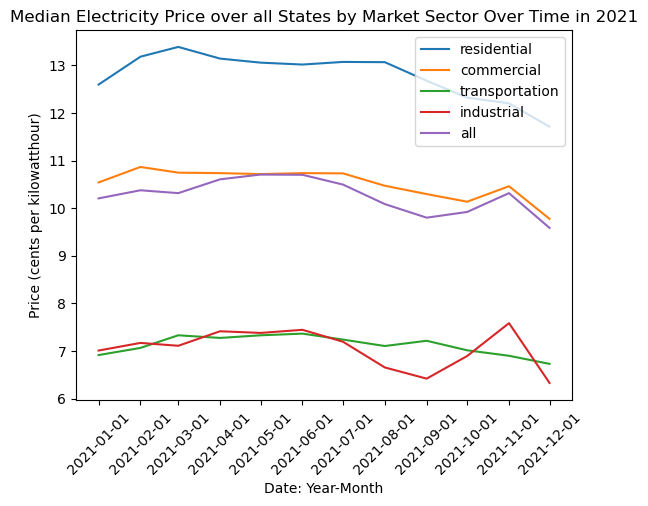

In [23]:
residentialPlt, = plt.plot(residential["period"].unique(),residential.groupby("period")["price"].median(), label="residential")
commercialPlt, = plt.plot(commercial["period"].unique(),commercial.groupby("period")["price"].median(),label="commercial")
transportationPlt, = plt.plot(transportation["period"].unique(),transportation.groupby("period")["price"].median(),label="transportation")
industrialPlt, = plt.plot(industrial["period"].unique(),industrial.groupby("period")["price"].median(),label="industrial")
allSectorsPlt, = plt.plot(allSectors["period"].unique(),allSectors.groupby("period")["price"].median(),label="all")

plt.xlabel("Date: Year-Month")
plt.ylabel("Price (cents per kilowatthour)")
plt.title("Median Electricity Price over all States by Market Sector Over Time in 2021")
x_axis = sectorDF["period"].unique()
plt.xticks(x_axis,rotation=45)
plt.legend()

plt.show()

In [ ]:
sectorDF.set_index("period",inplace=True)


In [ ]:
sectorDF.head()

In [ ]:
fig, ax = plt.subplots()
for key, sector in sectorDF.groupby(["sectorid"]):
    ax = sector.plot(ax=ax,kind="line",x="period",y="price",label=key)
ax.legend(loc="best")
plt.show()

In [ ]:
sectorGrp = sectorDF.groupby("sectorid")
sectorGrp.head()

In [ ]:
plt.plot(sectorTimePlt["period"],sectorTimePlt["price"])

In [ ]:
sectorDF\
    .groupby([sectorDF["period"],sectorDF["sectorid"]])\
    .mean()\
    .unstack()\
    .plot()

In [ ]:
plt.plot(residential["period"],residential["price"])

In [19]:
residential["period"].unique()

array(['2021-12-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')